# Steps for Calculating PCA from Scratch

In [2]:
# Step 1: Standardize the dataset.

# Step 2: Calculate the covariance matrix for the features in the dataset.

# Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.

# Step 4: Sort eigenvalues and their corresponding eigenvectors.

# Step 5: Pick k eigenvalues and form a matrix of eigenvectors.

# Step 6: Transform the original matrix.

In [3]:
# Necessary Dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
#reading the training data
data = pd.read_csv('train.csv')

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#creating the Target column or Y column 
target = data['label']

In [7]:
set(target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
#Drop the target column and remaining will be the x column 
x = data.drop(['label'],axis=1)

In [9]:
print(x.shape)
print(target.shape)

(42000, 784)
(42000,)


# To display a random image 

/home/pcuser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


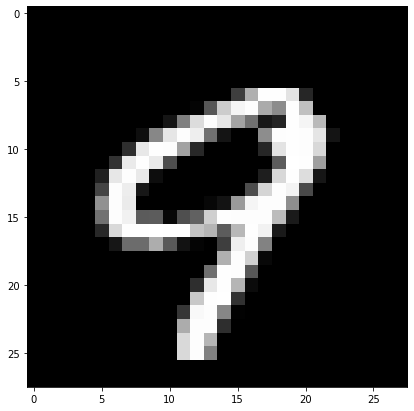

9


In [10]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = x.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(target[idx])



# Taking limited number of data to get pca Computation

In [11]:
#Just taking only limited number of data points for PCA 
labels = target.head(15000)
data = x.head(15000)

# Pre Processing Section

In [12]:
#pre - Processing class just like a library
class StandardScaler(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [13]:
standardized_data = StandardScaler().fit_transform(data)

## Treating the null and Nan values 

In [14]:
#converting the NAN values to numbers 
standardized_data = np.nan_to_num(standardized_data)

In [15]:
print(standardized_data.shape)

(15000, 784)


In [16]:
sample_data = standardized_data

In [17]:
print(sample_data.T.shape)

(784, 15000)


In [18]:
#finding the Co - Variance matrix 
covar_matrix = np.cov(standardized_data.T)

In [19]:
covar_matrix.shape

(784, 784)

In [20]:
# #finding eighen values and eighen vectores form co variance Matrix
values,vectors = eigh(covar_matrix, eigvals=(782,783))

In [21]:
vectors.shape

(784, 2)

In [22]:
values.shape

(2,)

In [23]:
len(vectors)

784

# The Below Block of code is from numpy package

In [24]:
# values,vectors = eig(covar_matrix)
# values = values[-2:]
# vectors = vectors[:,-2:]
# print(values.shape)

In [25]:
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Updated shape of eigen vectors =  (2, 784)


In [26]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

In [27]:
print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [28]:
# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels)).T

In [29]:
new_coordinates

array([[-5.5586608 , -5.04355835,  1.        ],
       [ 6.19363477, 19.30527806,  0.        ],
       [-1.90987794, -7.67877525,  1.        ],
       ...,
       [-2.14793723, -1.50726893,  8.        ],
       [ 3.20412249, -6.53731291,  9.        ],
       [-6.87896871, -1.25625388,  6.        ]])

# creating a dataframe to visuvalize the pca components 

In [30]:
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

In [31]:
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


# visuvalization of PCA components using Matplotlib

<Figure size 432x288 with 0 Axes>

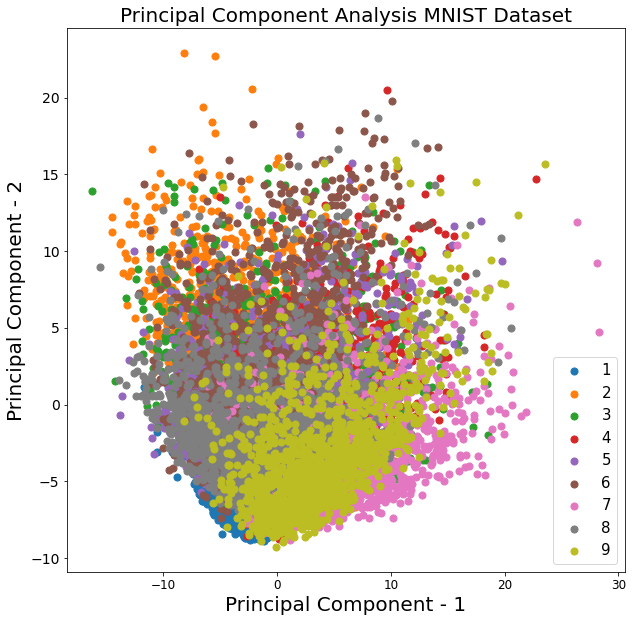

In [32]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis MNIST Dataset",fontsize=20)
targets = [1,2,3,4,5,6,7,8,9]
colors = ['r', 'g','b','y','v','o','bl','c','tab:olive']
for target, color in zip(targets,colors):
    indicesToKeep = dataframe['label'] == target
    plt.scatter(dataframe.loc[indicesToKeep, '1st_principal']
               , dataframe.loc[indicesToKeep, '2nd_principal'], s = 50)

plt.legend(targets,prop={'size': 15})

# visuvalization of PCA components using seaboarn


/home/pcuser/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


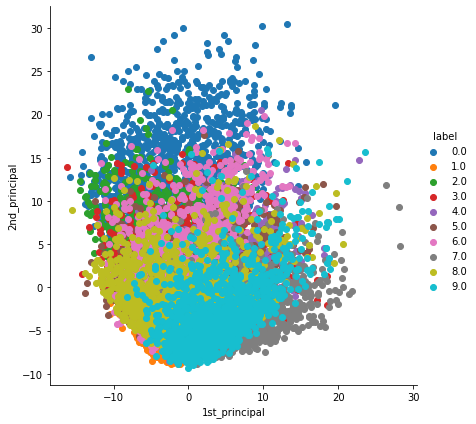

<Figure size 720x720 with 0 Axes>

In [33]:
# ploting the 2d data points with seaborn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.figure(figsize=(10,10))
plt.show()